In [37]:
# EDA를 위한 분석 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#검증 데이터 분리를 위한 함수
from sklearn.model_selection import train_test_split
#학습을 위한 모델 클래스
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#평가를 위한 함수(정확도)
from sklearn.metrics import accuracy_score

In [38]:
train = pd.read_csv("./data/salary/train.csv", index_col="no")
test = pd.read_csv("./data/salary/test.csv" , index_col="no")
display("Train")
display(train.head())
display("Test")
display(test.head())

'Train'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1


'Test'

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
no,,,,,,,,,,,,,,
29306,18,?,245274,Some-college,10,Never-married,?,Own-child,White,Male,0,0,16,United-States
29307,29,Private,83003,HS-grad,9,Married-civ-spouse,Other-service,Wife,White,Female,0,0,40,United-States
29308,45,Private,35136,Bachelors,13,Married-civ-spouse,Tech-support,Husband,Black,Male,0,0,40,United-States
29309,42,Self-emp-not-inc,64631,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States
29310,41,Private,195821,Doctorate,16,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1902,40,United-States


In [39]:
# 전체 데이터 수 파악
train.shape, test.shape

((29305, 15), (19537, 14))

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29305 entries, 1 to 29305
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29305 non-null  int64 
 1   workclass       29305 non-null  object
 2   fnlwgt          29305 non-null  int64 
 3   education       29305 non-null  object
 4   education-num   29305 non-null  int64 
 5   marital-status  29305 non-null  object
 6   occupation      29305 non-null  object
 7   relationship    29305 non-null  object
 8   race            29305 non-null  object
 9   sex             29305 non-null  object
 10  capital-gain    29305 non-null  int64 
 11  capital-loss    29305 non-null  int64 
 12  hours-per-week  29305 non-null  int64 
 13  native-country  29305 non-null  object
 14  income          29305 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.6+ MB


In [41]:
# 범주형 데이터
# workclass, education, marital-status, occupation, relationship, race, sex, native-country
# 수치형 데이터
# age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week

In [42]:
display(train.corr()) # 상관계수 확인

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.075753,0.035084,0.078498,0.054413,0.073100,0.238460
fnlwgt,-0.075753,1.000000,-0.030600,-0.005051,-0.001513,-0.010154,-0.002994
education-num,0.035084,-0.030600,1.000000,0.127651,0.083925,0.147569,0.331798
capital-gain,0.078498,-0.005051,0.127651,1.000000,-0.031401,0.088609,0.221387
capital-loss,0.054413,-0.001513,0.083925,-0.031401,1.000000,0.055271,0.135645
hours-per-week,0.073100,-0.010154,0.147569,0.088609,0.055271,1.000000,0.231045
income,0.238460,-0.002994,0.331798,0.221387,0.135645,0.231045,1.000000


In [43]:
# 결측치 확인(결측치 null이 아닌 " ?"로 처리되어있음) 
# 숫자형에는 결측치 없음
# workclass(1663), occupation(1668), native-country(495) 결측치 있음
# workclass - private 수가 너무 많아서 의미 없을거 같음(결측치private로 처리)
# occupation - 결측치 처리 하지 않고 ? 그대로 사용할것임 -> 3~4단계로 분류
# native-country - United-States수가 너무 많아서 의미 없을거 같음(결측치United-States로 처리)
train[train['native-country']==" ?"].count()


age               495
workclass         495
fnlwgt            495
education         495
education-num     495
marital-status    495
occupation        495
relationship      495
race              495
sex               495
capital-gain      495
capital-loss      495
hours-per-week    495
native-country    495
income            495
dtype: int64

In [44]:
train['native-country']=train['native-country'].str.replace("?","United-States")
train['workclass']=train['workclass'].str.replace("?","private")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_7784\1488058291.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['native-country']=train['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_7784\1488058291.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['workclass']=train['workclass'].str.replace("?","private")


In [45]:
test['native-country']=test['native-country'].str.replace("?","United-States")
test['workclass']=test['workclass'].str.replace("?","private")

C:\Users\pipi1\AppData\Local\Temp\ipykernel_7784\1070983275.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['native-country']=test['native-country'].str.replace("?","United-States")
C:\Users\pipi1\AppData\Local\Temp\ipykernel_7784\1070983275.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test['workclass']=test['workclass'].str.replace("?","private")


In [46]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,Machine-op-inspct,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,Other-service,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,Handlers-cleaners,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,Sales,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,Sales,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,Farming-fishing,Own-child,White,Male,0,0,40,United-States,0


In [47]:
# 인코딩
# workclass - 의미X
# education - education-num이랑 비율같아서 인코딩 필요 없음
# race - white 비율 너무 높아서 의미X
# native-country - United-States 비율 너무 높아서 의미X
# 원핫인코딩 marital-status, occupation, relationship, sex
# 라벨인코딩 marital-status,occupation(income 과 비교해서 라벨링 해보기)

In [48]:
train['native-country'].value_counts()

 United-States                 26796
 Mexico                          579
 Philippines                     178
 Germany                         124
 Puerto-Rico                     117
 Canada                          111
 El-Salvador                      96
 Cuba                             94
 India                            90
 England                          75
 South                            74
 Jamaica                          68
 China                            68
 Dominican-Republic               61
 Italy                            60
 Japan                            54
 Columbia                         53
 Poland                           53
 Guatemala                        51
 Haiti                            51
 Vietnam                          50
 Portugal                         43
 Taiwan                           39
 Iran                             38
 Nicaragua                        28
 Peru                             25
 Greece                           25
 

In [49]:
list=np.arange(1,16)
list=list.tolist()
list

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [50]:
train[['occupation','income']].groupby(['occupation']).mean().sort_values(by='income')

,income
occupation,
Priv-house-serv,0.020548
Other-service,0.043361
Handlers-cleaners,0.066453
?,0.104916
Farming-fishing,0.106982
Machine-op-inspct,0.131971
Adm-clerical,0.133140
Transport-moving,0.202441
Craft-repair,0.225771


In [51]:
# 라벨인코딩 marital-status,occupation(income 과 비교해서 라벨링 해보기)
# occupation
a=(train[['occupation','income']].groupby(['occupation']).mean().sort_values(by="income").reset_index())
a['occupation'].to_dict()

{0: ' Priv-house-serv',
 1: ' Other-service',
 2: ' Handlers-cleaners',
 3: ' ?',
 4: ' Farming-fishing',
 5: ' Machine-op-inspct',
 6: ' Adm-clerical',
 7: ' Transport-moving',
 8: ' Craft-repair',
 9: ' Sales',
 10: ' Tech-support',
 11: ' Armed-Forces',
 12: ' Protective-serv',
 13: ' Prof-specialty',
 14: ' Exec-managerial'}

In [52]:
method_dict = {
    ' Priv-house-serv':0,
    ' Other-service':0,
    ' Handlers-cleaners':0,
    ' ?':1,
    ' Farming-fishing':1,
    ' Machine-op-inspct':1,
    ' Adm-clerical':1,
    ' Transport-moving':2,
    ' Craft-repair':2,
    ' Sales':2,
    ' Tech-support':2,
    ' Armed-Forces':3,
    ' Protective-serv':3,
    ' Prof-specialty':4,
    ' Exec-managerial':4
    }
train['occupation']=train['occupation'].map(method_dict)
test['occupation']=test['occupation'].map(method_dict)

In [53]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,Divorced,1,Not-in-family,White,Male,0,0,40,United-States,0
2,39,Private,52978,Some-college,10,Divorced,0,Not-in-family,White,Female,0,1721,55,United-States,0
3,35,Private,196899,Bachelors,13,Never-married,0,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0
4,64,Private,135527,Assoc-voc,11,Divorced,2,Not-in-family,White,Female,0,0,40,United-States,0
5,24,Private,60783,Some-college,10,Married-civ-spouse,2,Husband,White,Male,0,0,70,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Never-married,2,Own-child,Other,Male,0,0,40,Puerto-Rico,0
29302,21,Private,372636,HS-grad,9,Never-married,2,Own-child,Black,Male,0,0,40,United-States,0
29303,18,Self-emp-not-inc,258474,10th,6,Never-married,1,Own-child,White,Male,0,0,40,United-States,0


In [54]:
# marital-status
a=(train[['marital-status','income']].groupby(['marital-status']).mean().sort_values(by="income").reset_index())
a

,marital-status,income
0,Never-married,0.046831
1,Separated,0.067834
2,Widowed,0.083864
3,Married-spouse-absent,0.093909
4,Divorced,0.104467
5,Married-AF-spouse,0.380952
6,Married-civ-spouse,0.448954


In [55]:
train['marital-status']

no
1                   Divorced
2                   Divorced
3              Never-married
4                   Divorced
5         Married-civ-spouse
                ...         
29301          Never-married
29302          Never-married
29303          Never-married
29304          Never-married
29305                Widowed
Name: marital-status, Length: 29305, dtype: object

In [56]:
method_dict = {
    ' Never-married':0,
    ' Separated':1,
    ' Widowed':2,
    ' Married-spouse-absent':3,
    ' Divorced':4,
    ' Married-AF-spouse':5,
    ' Married-civ-spouse':6
 }
train['marital-status']=train['marital-status'].map(method_dict)
test['marital-status']=test['marital-status'].map(method_dict)


In [57]:
train[['marital-status','income']].groupby(['marital-status']).mean().sort_values(by="income")

,income
marital-status,
0,0.046831
1,0.067834
2,0.083864
3,0.093909
4,0.104467
5,0.380952
6,0.448954


In [58]:
# 나이 구간으로 나눔
# 이상 미만
age_all_=[]
age_income_=[]
age_=[]
for i in range(15,101,5):
    a=train[train['age']<i+5].count()['age']-train[train['age']<=i].count()['age']
    age_all_.append(a)
    b=train[train['age']<i+5][train['income']==1].count()['age']-train[train['age']<=i][train['income']==1].count()['age']
    age_income_.append(b)
    age_.append(str(i)+'~'+str(i+5))

C:\Users\pipi1\AppData\Local\Temp\ipykernel_7784\2005077350.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  b=train[train['age']<i+5][train['income']==1].count()['age']-train[train['age']<=i][train['income']==1].count()['age']


In [59]:
data3=pd.DataFrame([age_all_,age_income_], columns=age_).T
data3

,0,1
15~20,1479,2
20~25,2910,52
25~30,2874,323
30~35,3192,717
35~40,3042,1007
40~45,2709,979
45~50,2313,920
50~55,1757,719
55~60,1321,481
60~65,912,262


In [60]:
data3[2]=data3[1]/data3[0]
data3

,0,1,2
15~20,1479,2,0.001352
20~25,2910,52,0.017869
25~30,2874,323,0.112387
30~35,3192,717,0.224624
35~40,3042,1007,0.331032
40~45,2709,979,0.361388
45~50,2313,920,0.397752
50~55,1757,719,0.409220
55~60,1321,481,0.364118
60~65,912,262,0.287281


In [61]:
#구간화 작업
bins=[15,20,25,35,40,55,60,90,100]  #(이상,미만)
cat=[1,2,3,4,5,6,7,8]
age_cut = pd.cut(train['age'],bins=bins,labels=cat)
age_cut

no
1        2
2        4
3        3
4        7
5        2
        ..
29301    1
29302    2
29303    1
29304    3
29305    7
Name: age, Length: 29305, dtype: category
Categories (8, int64): [1 < 2 < 3 < 4 < 5 < 6 < 7 < 8]

In [62]:
train['age_cut'] = age_cut
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cut
no,,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,1,Not-in-family,White,Male,0,0,40,United-States,0,2
2,39,Private,52978,Some-college,10,4,0,Not-in-family,White,Female,0,1721,55,United-States,0,4
3,35,Private,196899,Bachelors,13,0,0,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,3
4,64,Private,135527,Assoc-voc,11,4,2,Not-in-family,White,Female,0,0,40,United-States,0,7
5,24,Private,60783,Some-college,10,6,2,Husband,White,Male,0,0,70,United-States,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,2,Own-child,Other,Male,0,0,40,Puerto-Rico,0,1
29302,21,Private,372636,HS-grad,9,0,2,Own-child,Black,Male,0,0,40,United-States,0,2
29303,18,Self-emp-not-inc,258474,10th,6,0,1,Own-child,White,Male,0,0,40,United-States,0,1


In [63]:
# test 데이터 적용
age_cut_test= pd.cut(test['age'],bins=bins,labels=cat)
test['age_cut'] = age_cut_test

In [64]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cut
no,,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,1,Not-in-family,White,Male,0,0,40,United-States,0,2
2,39,Private,52978,Some-college,10,4,0,Not-in-family,White,Female,0,1721,55,United-States,0,4
3,35,Private,196899,Bachelors,13,0,0,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,3
4,64,Private,135527,Assoc-voc,11,4,2,Not-in-family,White,Female,0,0,40,United-States,0,7
5,24,Private,60783,Some-college,10,6,2,Husband,White,Male,0,0,70,United-States,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,2,Own-child,Other,Male,0,0,40,Puerto-Rico,0,1
29302,21,Private,372636,HS-grad,9,0,2,Own-child,Black,Male,0,0,40,United-States,0,2
29303,18,Self-emp-not-inc,258474,10th,6,0,1,Own-child,White,Male,0,0,40,United-States,0,1


In [65]:
# 정답 분리

y = train.loc[:,'income'] 
X = train.drop(['income'],axis=1)
X

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,age_cut
no,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,1,Not-in-family,White,Male,0,0,40,United-States,2
2,39,Private,52978,Some-college,10,4,0,Not-in-family,White,Female,0,1721,55,United-States,4
3,35,Private,196899,Bachelors,13,0,0,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,3
4,64,Private,135527,Assoc-voc,11,4,2,Not-in-family,White,Female,0,0,40,United-States,7
5,24,Private,60783,Some-college,10,6,2,Husband,White,Male,0,0,70,United-States,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,2,Own-child,Other,Male,0,0,40,Puerto-Rico,1
29302,21,Private,372636,HS-grad,9,0,2,Own-child,Black,Male,0,0,40,United-States,2
29303,18,Self-emp-not-inc,258474,10th,6,0,1,Own-child,White,Male,0,0,40,United-States,1


In [66]:
train

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,age_cut
no,,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,4,1,Not-in-family,White,Male,0,0,40,United-States,0,2
2,39,Private,52978,Some-college,10,4,0,Not-in-family,White,Female,0,1721,55,United-States,0,4
3,35,Private,196899,Bachelors,13,0,0,Not-in-family,Asian-Pac-Islander,Female,0,0,50,Haiti,0,3
4,64,Private,135527,Assoc-voc,11,4,2,Not-in-family,White,Female,0,0,40,United-States,0,7
5,24,Private,60783,Some-college,10,6,2,Husband,White,Male,0,0,70,United-States,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,0,2,Own-child,Other,Male,0,0,40,Puerto-Rico,0,1
29302,21,Private,372636,HS-grad,9,0,2,Own-child,Black,Male,0,0,40,United-States,0,2
29303,18,Self-emp-not-inc,258474,10th,6,0,1,Own-child,White,Male,0,0,40,United-States,0,1


In [67]:
#원핫 인코딩  marital-status, occupation, relationship, sex
feature_names=['marital-status', 'occupation', 'relationship', 'sex']
train_one_hot = pd.get_dummies(X[feature_names])
train_one_hot

,marital-status,occupation,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,
1,4,1,0,1,0,0,0,0,0,1
2,4,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0
4,4,2,0,1,0,0,0,0,1,0
5,6,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
29301,0,2,0,0,0,1,0,0,0,1
29302,0,2,0,0,0,1,0,0,0,1
29303,0,1,0,0,0,1,0,0,0,1


In [68]:
# test처리
test_one_hot = pd.get_dummies(test[feature_names])
test_one_hot

,marital-status,occupation,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,
29306,0,1,0,0,0,1,0,0,0,1
29307,6,0,0,0,0,0,0,1,1,0
29308,6,2,1,0,0,0,0,0,0,1
29309,6,4,1,0,0,0,0,0,0,1
29310,6,4,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...
48838,6,2,1,0,0,0,0,0,0,1
48839,0,4,0,1,0,0,0,0,1,0
48840,6,4,1,0,0,0,0,0,0,1


In [69]:
# 원핫인코딩한거 붙이기
train = pd.concat([X,train_one_hot], axis=1)
test = pd.concat([test,test_one_hot], axis=1)

In [70]:
train.drop(feature_names,axis=1,inplace=True)
test.drop(feature_names,axis=1,inplace=True)

In [71]:
train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'race',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'age_cut', 'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife', 'sex_ Female',
       'sex_ Male'],
      dtype='object')

In [72]:
train

,age,workclass,fnlwgt,education,education-num,race,capital-gain,capital-loss,hours-per-week,native-country,age_cut,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,,,,,,
1,25,Private,219199,11th,7,White,0,0,40,United-States,2,0,1,0,0,0,0,0,1
2,39,Private,52978,Some-college,10,White,0,1721,55,United-States,4,0,1,0,0,0,0,1,0
3,35,Private,196899,Bachelors,13,Asian-Pac-Islander,0,0,50,Haiti,3,0,1,0,0,0,0,1,0
4,64,Private,135527,Assoc-voc,11,White,0,0,40,United-States,7,0,1,0,0,0,0,1,0
5,24,Private,60783,Some-college,10,White,0,0,70,United-States,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,Private,100605,HS-grad,9,Other,0,0,40,Puerto-Rico,1,0,0,0,1,0,0,0,1
29302,21,Private,372636,HS-grad,9,Black,0,0,40,United-States,2,0,0,0,1,0,0,0,1
29303,18,Self-emp-not-inc,258474,10th,6,White,0,0,40,United-States,1,0,0,0,1,0,0,0,1


In [73]:
train.drop(['workclass', 'fnlwgt', 'education','race','native-country'],axis=1,inplace=True)
train

,age,education-num,capital-gain,capital-loss,hours-per-week,age_cut,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,
1,25,7,0,0,40,2,0,1,0,0,0,0,0,1
2,39,10,0,1721,55,4,0,1,0,0,0,0,1,0
3,35,13,0,0,50,3,0,1,0,0,0,0,1,0
4,64,11,0,0,40,7,0,1,0,0,0,0,1,0
5,24,10,0,0,70,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,9,0,0,40,1,0,0,0,1,0,0,0,1
29302,21,9,0,0,40,2,0,0,0,1,0,0,0,1
29303,18,6,0,0,40,1,0,0,0,1,0,0,0,1


In [98]:
test.drop(['workclass', 'fnlwgt', 'education','race','native-country'],axis=1,inplace=True)

In [74]:
train

,age,education-num,capital-gain,capital-loss,hours-per-week,age_cut,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,
1,25,7,0,0,40,2,0,1,0,0,0,0,0,1
2,39,10,0,1721,55,4,0,1,0,0,0,0,1,0
3,35,13,0,0,50,3,0,1,0,0,0,0,1,0
4,64,11,0,0,40,7,0,1,0,0,0,0,1,0
5,24,10,0,0,70,2,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,9,0,0,40,1,0,0,0,1,0,0,0,1
29302,21,9,0,0,40,2,0,0,0,1,0,0,0,1
29303,18,6,0,0,40,1,0,0,0,1,0,0,0,1


In [99]:
# 새로 추가한 Cabin_T 때문에 test의 컬럼순서가 1칸씩 밀림
# (train에만 있는 컬럼이라 학습한거와 테스트할때 다를 수 있음)
train.sort_index(axis=1,inplace=True)
test.sort_index(axis=1,inplace=True)

In [100]:
set(train.columns)-set(test.columns)

set()

In [101]:
train.shape, test.shape

((29305, 14), (19537, 14))

In [96]:
train

,age,age_cut,capital-gain,capital-loss,education-num,hours-per-week,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,
1,25,2,0,0,7,40,0,1,0,0,0,0,0,1
2,39,4,0,1721,10,55,0,1,0,0,0,0,1,0
3,35,3,0,0,13,50,0,1,0,0,0,0,1,0
4,64,7,0,0,11,40,0,1,0,0,0,0,1,0
5,24,2,0,0,10,70,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,20,1,0,0,9,40,0,0,0,1,0,0,0,1
29302,21,2,0,0,9,40,0,0,0,1,0,0,0,1
29303,18,1,0,0,6,40,0,0,0,1,0,0,0,1


In [97]:
test

,age,age_cut,capital-gain,capital-loss,education,education-num,fnlwgt,hours-per-week,native-country,race,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male,workclass
no,,,,,,,,,,,,,,,,,,,
29306,18,1,0,0,Some-college,10,245274,16,United-States,White,0,0,0,1,0,0,0,1,private
29307,29,3,0,0,HS-grad,9,83003,40,United-States,White,0,0,0,0,0,1,1,0,Private
29308,45,5,0,0,Bachelors,13,35136,40,United-States,Black,1,0,0,0,0,0,0,1,Private
29309,42,5,0,0,Bachelors,13,64631,40,United-States,White,1,0,0,0,0,0,0,1,Self-emp-not-inc
29310,41,5,0,1902,Doctorate,16,195821,40,United-States,White,0,0,0,0,0,1,1,0,Private
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,5,0,0,HS-grad,9,116789,60,United-States,White,1,0,0,0,0,0,0,1,Self-emp-not-inc
48839,48,5,0,0,HS-grad,9,185079,50,United-States,White,0,1,0,0,0,0,1,0,Private
48840,63,7,4386,0,Some-college,10,117473,40,United-States,White,1,0,0,0,0,0,0,1,Private


In [102]:
# 모델 정의
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()

In [103]:
# 2. 훈련데이터를 8:2로 분리해서 train2,val셋으로 구성
# (randomstate = 921)
X_train2,X_val,y_train2,y_val=train_test_split(train,y,test_size=0.2, random_state=0)

In [104]:
#3-1. KNN 모델 최적화
train_score_list = []   # 훈련데이터 점수 리스트
val_score_list = []   # 검증데이터 점수 리스트
for n in range(1,25):   #이웃의 숫자를 1~24명 설정
    m=KNeighborsClassifier(n_neighbors=n)
    m.fit(X_train2,y_train2)
    # 훈련데이터 예측 및 평가
    pre_train = m.predict(X_train2)
    score_train = accuracy_score(y_train2, pre_train)
    train_score_list.append(score_train)
    # 검증데이터 예측 및 평가
    pre_val = m.predict(X_val)
    score_val = accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)


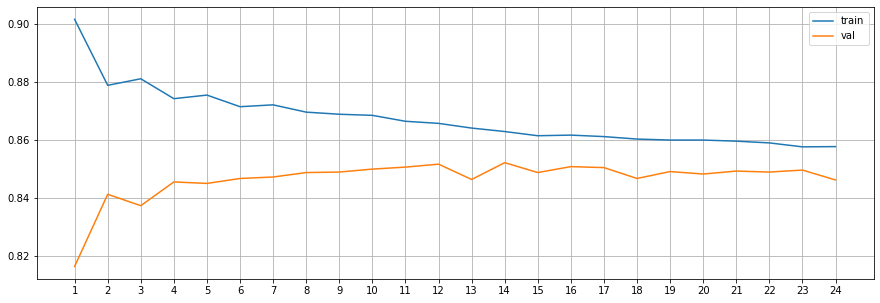

In [105]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,25),train_score_list, label='train') # 라인1
plt.plot(range(1,25),val_score_list, label='val') # 라인2
plt.xticks(range(1,25)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기


In [106]:
# 3-2 tree 모델 최적화
train_score_list=[] #훈련데이터 평가 점수가 담긴다.
val_score_list=[] #검증데이터 평가 점수가 담긴다.
for d in range(1,31): 
    m = DecisionTreeClassifier(max_depth=d) # 최대깊이가 다른 모델을 계속 생성
    m.fit(X_train2,y_train2)
    #훈련데이터 예측
    pre_train = m.predict(X_train2) 
    score_train=accuracy_score(y_train2,pre_train)
    train_score_list.append(score_train)
    #검증데이터 예측
    pre_val = m.predict(X_val)
    score_val=accuracy_score(y_val,pre_val)
    val_score_list.append(score_val)

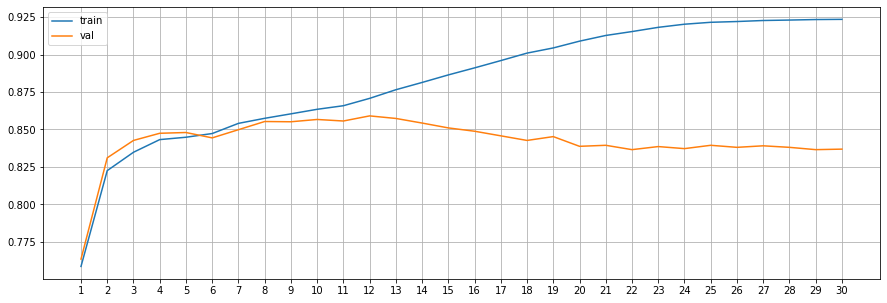

In [107]:
# 시각화 
plt.figure(figsize=(15,5)) # 그림의 크기 설정(가로,세로) 인치
plt.plot(range(1,31),train_score_list, label='train') # 라인1
plt.plot(range(1,31),val_score_list, label='val') # 라인2
plt.xticks(range(1,31)) # x축 눈금
plt.grid() # 배경 격자무늬
plt.legend() # 범례
plt.show() # 그림 보여주기

In [108]:
# 3. 최종 학습
final_knn_model = KNeighborsClassifier(n_neighbors=2)
final_knn_model.fit(X_train2,y_train2)
final_tree_model = DecisionTreeClassifier(max_depth=2)
final_tree_model.fit(X_train2,y_train2)

DecisionTreeClassifier(max_depth=2)

In [84]:
test

,age,workclass,fnlwgt,education,education-num,race,capital-gain,capital-loss,hours-per-week,native-country,age_cut,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,sex_ Female,sex_ Male
no,,,,,,,,,,,,,,,,,,,
29306,18,private,245274,Some-college,10,White,0,0,16,United-States,1,0,0,0,1,0,0,0,1
29307,29,Private,83003,HS-grad,9,White,0,0,40,United-States,3,0,0,0,0,0,1,1,0
29308,45,Private,35136,Bachelors,13,Black,0,0,40,United-States,5,1,0,0,0,0,0,0,1
29309,42,Self-emp-not-inc,64631,Bachelors,13,White,0,0,40,United-States,5,1,0,0,0,0,0,0,1
29310,41,Private,195821,Doctorate,16,White,0,1902,40,United-States,5,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,45,Self-emp-not-inc,116789,HS-grad,9,White,0,0,60,United-States,5,1,0,0,0,0,0,0,1
48839,48,Private,185079,HS-grad,9,White,0,0,50,United-States,5,0,1,0,0,0,0,1,0
48840,63,Private,117473,Some-college,10,White,4386,0,40,United-States,7,1,0,0,0,0,0,0,1


In [109]:
# kaggle 업로드해서 평가
# 28개의 feature를 가진 test데이터를 활용
knn_pre = final_knn_model.predict(test)
tree_pre = final_tree_model.predict(test)

In [110]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [112]:
#KNN 예측 값 파일로 저장
submission['income'] = knn_pre
submission.to_csv("./data/salary/knn_pre1.csv", index=False)

In [113]:
#tree 예측 값 파일로 저장
submission['income'] = tree_pre
submission.to_csv("./data/salary/tree_pre1.csv", index=False)

In [115]:
#전처리한 파일 저장
train.to_csv("./data/salary/preprocessing_X_train.csv")
test.to_csv("./data/salary/preprocessing_X_test.csv")
y.to_csv("./data/salary/y_train.csv")

In [ ]:
ㅇㅇㅇㅇㅇ

NameError: name 'ᄋᄋᄋᄋᄋ' is not defined

In [ ]:
salary_model = KNeighborsClassifier()

In [ ]:
X_train= train[['education-num','capital-loss', 'hours-per-week','capital-gain',
       'relationship_ Husband', 'relationship_ Wife', 'sex_ Female',
       'sex_ Male']]
y_train= y
X_train1,X_val,y_train1,y_val=train_test_split(X_train,y_train,test_size=0.2, random_state=7)                                                                                                                       
salary_model.fit(X_train1,y_train1)
pre= salary_model.predict(X_val)
pre
score = accuracy_score(y_val,pre)
print("정확도 : ",score)

정확도 :  0.8246033100153557


In [ ]:
# 캐글 업로드
X_test= test[['education-num','capital-loss', 'hours-per-week',
       'relationship_ Husband', 'relationship_ Not-in-family',
       'relationship_ Other-relative', 'relationship_ Own-child',
       'relationship_ Unmarried', 'relationship_ Wife', 'sex_ Female',
       'sex_ Male']]

In [ ]:
test_pre=salary_model.predict(X_test)
test_pre

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [ ]:
submission = pd.read_csv("./data/salary/sample_submission.csv")
submission

,no,income
0,29306,0
1,29307,0
2,29308,0
3,29309,0
4,29310,0
...,...,...
19532,48838,1
19533,48839,0
19534,48840,1
19535,48841,0


In [114]:
#전처리한 파일 저장
X_train.to_csv("./data/salary/preprocessing_X_train.csv")
test.to_csv("./data/salary/preprocessing_X_test.csv")
y_train.to_csv("./data/salary/y_train.csv")

NameError: name 'X_train' is not defined